In [89]:
import pandas as pd
# Dataset will be stored in a Pandas Dataframe

#url = 'https://raw.githubusercontent.com/EnesGokceDS/NLP_with_Tourism_Data/master/tourism_tweets_cleaned.csv'
url= 'https://raw.githubusercontent.com/DataScience-in-Tourism/Introduction_to_NLP/main/tourism_tweets_cleaned.csv'
df = pd.read_csv(url)
df.head(5)

,Unnamed: 0,id1,url,url2,date,username,quote,tweet,as1,as2,as3,as4,as5,as6,as7,as8,as9,as10,as11,a12,id,guid,link,pubdate,author,title,description,source,user_id,profile_image_url,user_statuses_count,user_friends_count,user_followers_count,user_created_at,user_bio,user_location,lang,coords,Unnamed: 18,punctuation,hastags,stopwords,lng,lng_score,char_count,avg_word
0,0,1,https://twitter.com/_LoveCaribbean/statuses/12...,https://twitter.com/_LoveCaribbean/statuses/12...,2020-04-22 07:47:13,_LoveCaribbean,RT @grenadaexplorer: A tropical treasure to ch...,tropical treasure cherish forever exclusive t...,Twitter Web App,1356684936,https://pbs.twimg.com/profile_images/474150473...,8047,1099,3019,2013-04-16 07:55:23,#CaribbeanDreaming The diversity of the Caribb...,London,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,0,4,en,0.999996,232,10.6
1,1,2,https://twitter.com/carolcruising/statuses/125...,https://twitter.com/carolcruising/statuses/125...,2020-04-22 07:44:47,carolcruising,RT @clairesturz: Backpacking in #Cuba on a Bud...,backpack cuba budget travelsomeday armchair...,Twitter Web App,319114596,https://pbs.twimg.com/profile_images/630068953...,26683,660,1227,2011-06-17 11:47:16,Carol Colborn is the author of Carolina: Cruis...,"Phoenix, AZ",en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,3,en,0.999996,67,9.5
2,3,4,https://twitter.com/clairesturz/statuses/12529...,https://twitter.com/clairesturz/statuses/12529...,2020-04-22 07:32:39,clairesturz,Experience Buenos Aires like a local #travelso...,experience burns air like local travelsomeday...,Revive Social App,874023301,https://pbs.twimg.com/profile_images/613107654...,39950,19520,24799,2012-10-11 13:32:59,Helping you plan your best future travel adven...,"England, United Kingdom",es,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1,en,0.999997,88,8.3
3,4,5,https://twitter.com/grenadaexplorer/statuses/1...,https://twitter.com/grenadaexplorer/statuses/1...,2020-04-22 07:32:02,grenadaexplorer,Who can\'t wait for Grenada Sailing Festival 2...,cant wait grenade sail festival 2021 exclusi...,Buffer,17083471,https://pbs.twimg.com/profile_images/703782166...,4070,856,1882,2008-10-31 07:22:26,Travel & Island Guide for Grenada in the Carib...,Grenada,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,0,3,en,0.996475,227,10.3
4,5,6,https://twitter.com/ikefuller/statuses/1252922...,https://twitter.com/ikefuller/statuses/1252922...,2020-04-22 07:30:12,ikefuller,RT @clairesturz: The Best Hostel in Barcelona ...,best hostel barcelona fabrizzio s petit revi...,Twitter Web App,283127000,https://pbs.twimg.com/profile_images/992460827...,4720,126,130,2011-04-16 12:46:28,Traveling enthusiast and Solo Traveler,"Seattle, WA",en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0,2,en,0.857140,94,7.9


In [90]:
#Let's only use tweet column as data
# Redefine df
df= df.tweet

In [91]:
df.head()

0    tropical treasure cherish forever exclusive  t...
1    backpack  cuba budget  travelsomeday  armchair...
2    experience burns air like local  travelsomeday...
3    cant wait grenade sail festival 2021   exclusi...
4    best hostel barcelona  fabrizzio  s petit revi...
Name: tweet, dtype: object

In [92]:
df = str(df)
type(df)

str

In [93]:
import re
df = re.sub(r'[^a-zA-Z0-9\s]', ' ', df)

pattern = r'[0-9]'
# Match all digits in the string and replace them by empty string
df  = re.sub(pattern, '', df)

In [94]:
df = df.replace('\r', '').replace('\n', '')


In [95]:
import nltk
from nltk.util import ngrams
import re

tokens = [token for token in df.split(" ") if token != "" ]

#Let's check tokens for the first column
tokens[:20]

['tropical',
 'treasure',
 'cherish',
 'forever',
 'exclusive',
 't',
 'backpack',
 'cuba',
 'budget',
 'travelsomeday',
 'armchair',
 'experience',
 'burns',
 'air',
 'like',
 'local',
 'travelsomeday',
 'cant',
 'wait',
 'grenade']

In [96]:
list(ngrams(tokens, 5))

[('tropical', 'treasure', 'cherish', 'forever', 'exclusive'),
 ('treasure', 'cherish', 'forever', 'exclusive', 't'),
 ('cherish', 'forever', 'exclusive', 't', 'backpack'),
 ('forever', 'exclusive', 't', 'backpack', 'cuba'),
 ('exclusive', 't', 'backpack', 'cuba', 'budget'),
 ('t', 'backpack', 'cuba', 'budget', 'travelsomeday'),
 ('backpack', 'cuba', 'budget', 'travelsomeday', 'armchair'),
 ('cuba', 'budget', 'travelsomeday', 'armchair', 'experience'),
 ('budget', 'travelsomeday', 'armchair', 'experience', 'burns'),
 ('travelsomeday', 'armchair', 'experience', 'burns', 'air'),
 ('armchair', 'experience', 'burns', 'air', 'like'),
 ('experience', 'burns', 'air', 'like', 'local'),
 ('burns', 'air', 'like', 'local', 'travelsomeday'),
 ('air', 'like', 'local', 'travelsomeday', 'cant'),
 ('like', 'local', 'travelsomeday', 'cant', 'wait'),
 ('local', 'travelsomeday', 'cant', 'wait', 'grenade'),
 ('travelsomeday', 'cant', 'wait', 'grenade', 'sail'),
 ('cant', 'wait', 'grenade', 'sail', 'festiva

In [97]:
# Ngram with n=3
list(ngrams(tokens, 3))

[('tropical', 'treasure', 'cherish'),
 ('treasure', 'cherish', 'forever'),
 ('cherish', 'forever', 'exclusive'),
 ('forever', 'exclusive', 't'),
 ('exclusive', 't', 'backpack'),
 ('t', 'backpack', 'cuba'),
 ('backpack', 'cuba', 'budget'),
 ('cuba', 'budget', 'travelsomeday'),
 ('budget', 'travelsomeday', 'armchair'),
 ('travelsomeday', 'armchair', 'experience'),
 ('armchair', 'experience', 'burns'),
 ('experience', 'burns', 'air'),
 ('burns', 'air', 'like'),
 ('air', 'like', 'local'),
 ('like', 'local', 'travelsomeday'),
 ('local', 'travelsomeday', 'cant'),
 ('travelsomeday', 'cant', 'wait'),
 ('cant', 'wait', 'grenade'),
 ('wait', 'grenade', 'sail'),
 ('grenade', 'sail', 'festival'),
 ('sail', 'festival', 'exclusi'),
 ('festival', 'exclusi', 'best'),
 ('exclusi', 'best', 'hostel'),
 ('best', 'hostel', 'barcelona'),
 ('hostel', 'barcelona', 'fabrizzio'),
 ('barcelona', 'fabrizzio', 's'),
 ('fabrizzio', 's', 'petit'),
 ('s', 'petit', 'revi'),
 ('petit', 'revi', 'lip'),
 ('revi', 'lip', 

In [98]:
# Ngram with n=4
list(ngrams(tokens, 4))[:4]

[('tropical', 'treasure', 'cherish', 'forever'),
 ('treasure', 'cherish', 'forever', 'exclusive'),
 ('cherish', 'forever', 'exclusive', 't'),
 ('forever', 'exclusive', 't', 'backpack')]

In [99]:
pd.DataFrame(ngrams(tokens, 3)).sample(10)

,0,1,2
46,travel,travel,colombia
52,alone,safely,solo
41,access,travel,resou
48,colombia,alone,re
9,travelsomeday,armchair,experience
6,backpack,cuba,budget
62,black,friday,year
28,petit,revi,lip
2,cherish,forever,exclusive
13,air,like,local


In [100]:
(pd.Series(nltk.ngrams(tokens, 2)).value_counts())[:10]

(berlin, to)              1
(find, best)              1
(solo, travel)            1
(sail, festival)          1
(burns, air)              1
(t, backpack)             1
(flight, deal)            1
(air, like)               1
(barcelona, fabrizzio)    1
(exclusi, best)           1
dtype: int64

In [101]:
import collections
bigram_counts = collections.Counter(pd.Series(nltk.ngrams(tokens, 2)))
bigram_counts.most_common(20)

[(('tropical', 'treasure'), 1),
 (('treasure', 'cherish'), 1),
 (('cherish', 'forever'), 1),
 (('forever', 'exclusive'), 1),
 (('exclusive', 't'), 1),
 (('t', 'backpack'), 1),
 (('backpack', 'cuba'), 1),
 (('cuba', 'budget'), 1),
 (('budget', 'travelsomeday'), 1),
 (('travelsomeday', 'armchair'), 1),
 (('armchair', 'experience'), 1),
 (('experience', 'burns'), 1),
 (('burns', 'air'), 1),
 (('air', 'like'), 1),
 (('like', 'local'), 1),
 (('local', 'travelsomeday'), 1),
 (('travelsomeday', 'cant'), 1),
 (('cant', 'wait'), 1),
 (('wait', 'grenade'), 1),
 (('grenade', 'sail'), 1)]

In [102]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(tropical, treasure)",1
1,"(treasure, cherish)",1
2,"(cherish, forever)",1
3,"(forever, exclusive)",1
4,"(exclusive, t)",1
5,"(t, backpack)",1
6,"(backpack, cuba)",1
7,"(cuba, budget)",1
8,"(budget, travelsomeday)",1
9,"(travelsomeday, armchair)",1


In [103]:
pd.Series(nltk.ngrams(tokens, 2)).value_counts()

(berlin, to)          1
(find, best)          1
(solo, travel)        1
(sail, festival)      1
(burns, air)          1
                     ..
(best, hostel)        1
(cherish, forever)    1
(re, camp)            1
(wait, grenade)       1
(Length, dtype)       1
Length: 70, dtype: int64

Data Visulization for Bigram Networks

In [104]:
# Create dictionary of bigrams and their counts

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

d = bigram_df.set_index('bigram').T.to_dict('records')

In [105]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)

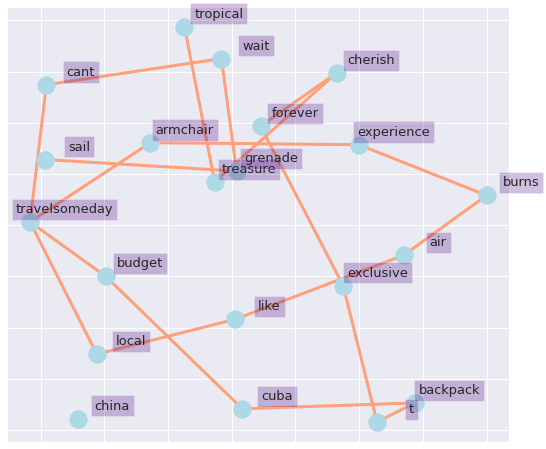

In [108]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(9, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='lightsalmon',
                 node_color='lightblue',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='indigo', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()